In [1]:
import sys; sys.path.append("..") 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.utility import loadfile, savefile, exists
from src.dataprocessing import *
from src import rnn

## load data

In [2]:
# Define variables
input_var   = ["FT-3061-2", "FT-3061-3", "FT-3061-4", "FT-3062-1"]
output_var  = ["TT-3061-3", "TT-3061-5", "LT-3061-2"]
process_var = input_var + output_var

In [3]:
min_len = 100
continuous_path = './data/3_continuous'

cts_list = []
i = 1
while exists(f"{continuous_path}/cts_{min_len}/dataset {min_len}_{i}.csv"):
    cts_df = loadfile(continuous_path, f"cts_{min_len}/dataset {min_len}_{i}", 'csv')
    cts_list.append(cts_df)
    i += 1

csv file is loaded from ./data/3_continuous/cts_100/dataset 100_1.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_2.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_3.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_4.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_5.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_6.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_7.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_8.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_9.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_10.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_11.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_12.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_13.csv
csv file is loaded from ./data/3_continuous/cts_100/dataset 100_14.csv
csv file is loa

In [4]:
target_list = cts_list

# history size and future size
history_list = [10, 20, 30, 40]
future_list = [10, 20, 30]
step = 1

# variable selection
history_var = process_var
future_var = output_var

history_num = len(history_var)
future_num = len(future_var)

# supervised attention factor
delta = 1
att_type = 'linear'
        
# test data split        
test_size = 0.2
test_num = -1

# model structure
num_layers = 1
num_neurons = 50
dense_layers = 1
dense_neurons = 50
model_type = 'datt_seq2seq_gru'

iteration_list = [x for x in range(1,11)]
future_size = 10
history_size = 10
history_result = []
i=0
for future_size in future_list:
    for history_size in history_list:            
        for iteration in iteration_list:
            model_num = iteration
            model_name = f"{history_size}_{future_size}_{num_layers}_{num_neurons}_{dense_layers}_{dense_neurons}_{model_type}_{model_num}"
            result = loadfile('./result', model_name, file_type='csv', header=1, print_msg=False)
            result.columns = ['R2_TT-3061-3', 'R2_TT-3061-5', 'R2_LT-3061-2', 'R2_MEAN', 'NRMSE_TT-3061-3', 'NRMSE_TT-3061-5', 'NRMSE_LT-3061-2', 'NRMSE_MEAN']
            time_steps = pd.DataFrame([f't+{i+1}' for i in range(future_size)]+['mean'], columns=['step'])
            result = pd.concat([result, time_steps], axis=1)
            result['future'] = future_size
            result['history'] = history_size
            result['iteration'] = iteration
            if not i:
                result_reshape = result
            else:
                result_reshape = pd.concat([result_reshape, result], axis=0)
            i += 1

c:\Project\dual_attention\venv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Project\dual_attention\venv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Project\dual_attention\venv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Project\dual_attention\venv\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Project\dual_attention\venv\lib\site-packages\seaborn\categorical.py:1296: UserWa

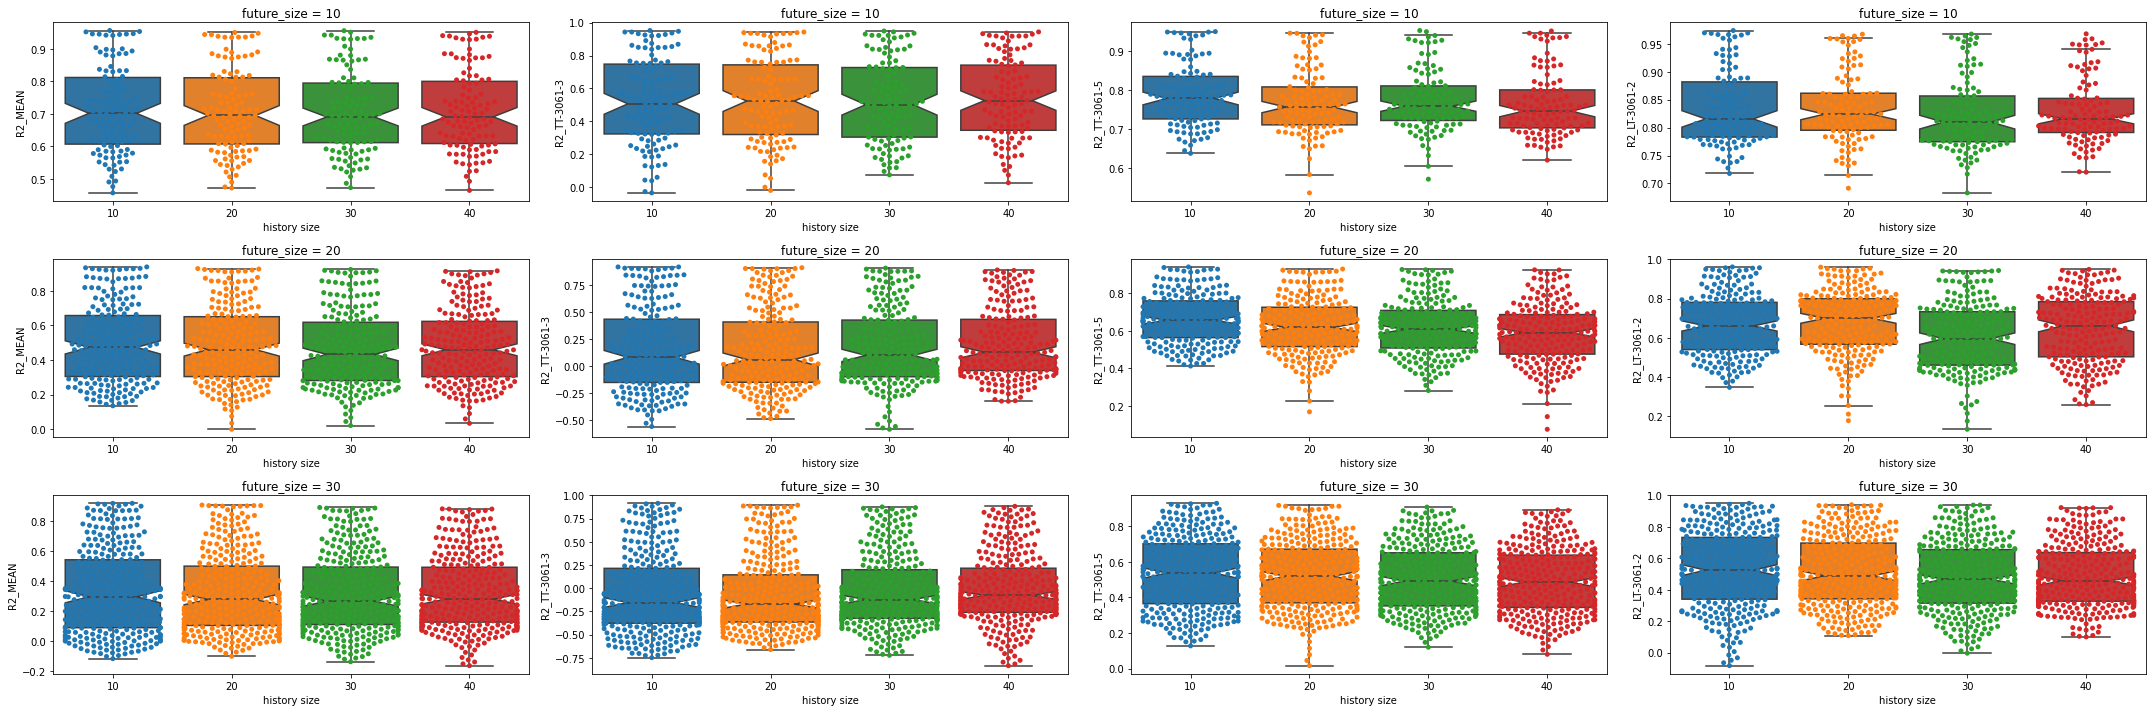

In [5]:
plot_var = ['R2_MEAN', 'R2_TT-3061-3', 'R2_TT-3061-5', 'R2_LT-3061-2']

plt.figure(figsize=(30,10))
for i, future_size in enumerate(future_list):
    for j, var in enumerate(plot_var):
        plot_data = result_reshape[result_reshape['future']==future_size]
        plt.subplot(len(future_list), len(plot_var), len(plot_var)*i+j+1)
        sns.swarmplot(x='history', y=var, data=plot_data)
        sns.boxplot(x='history', y=var, data=plot_data, notch=True, showfliers = False)
        
        # plt.ylim(-0.01, 0.3)
        plt.title(f"future_size = {future_size}")
        plt.xlabel('history size')
plt.tight_layout()

## future window = 10

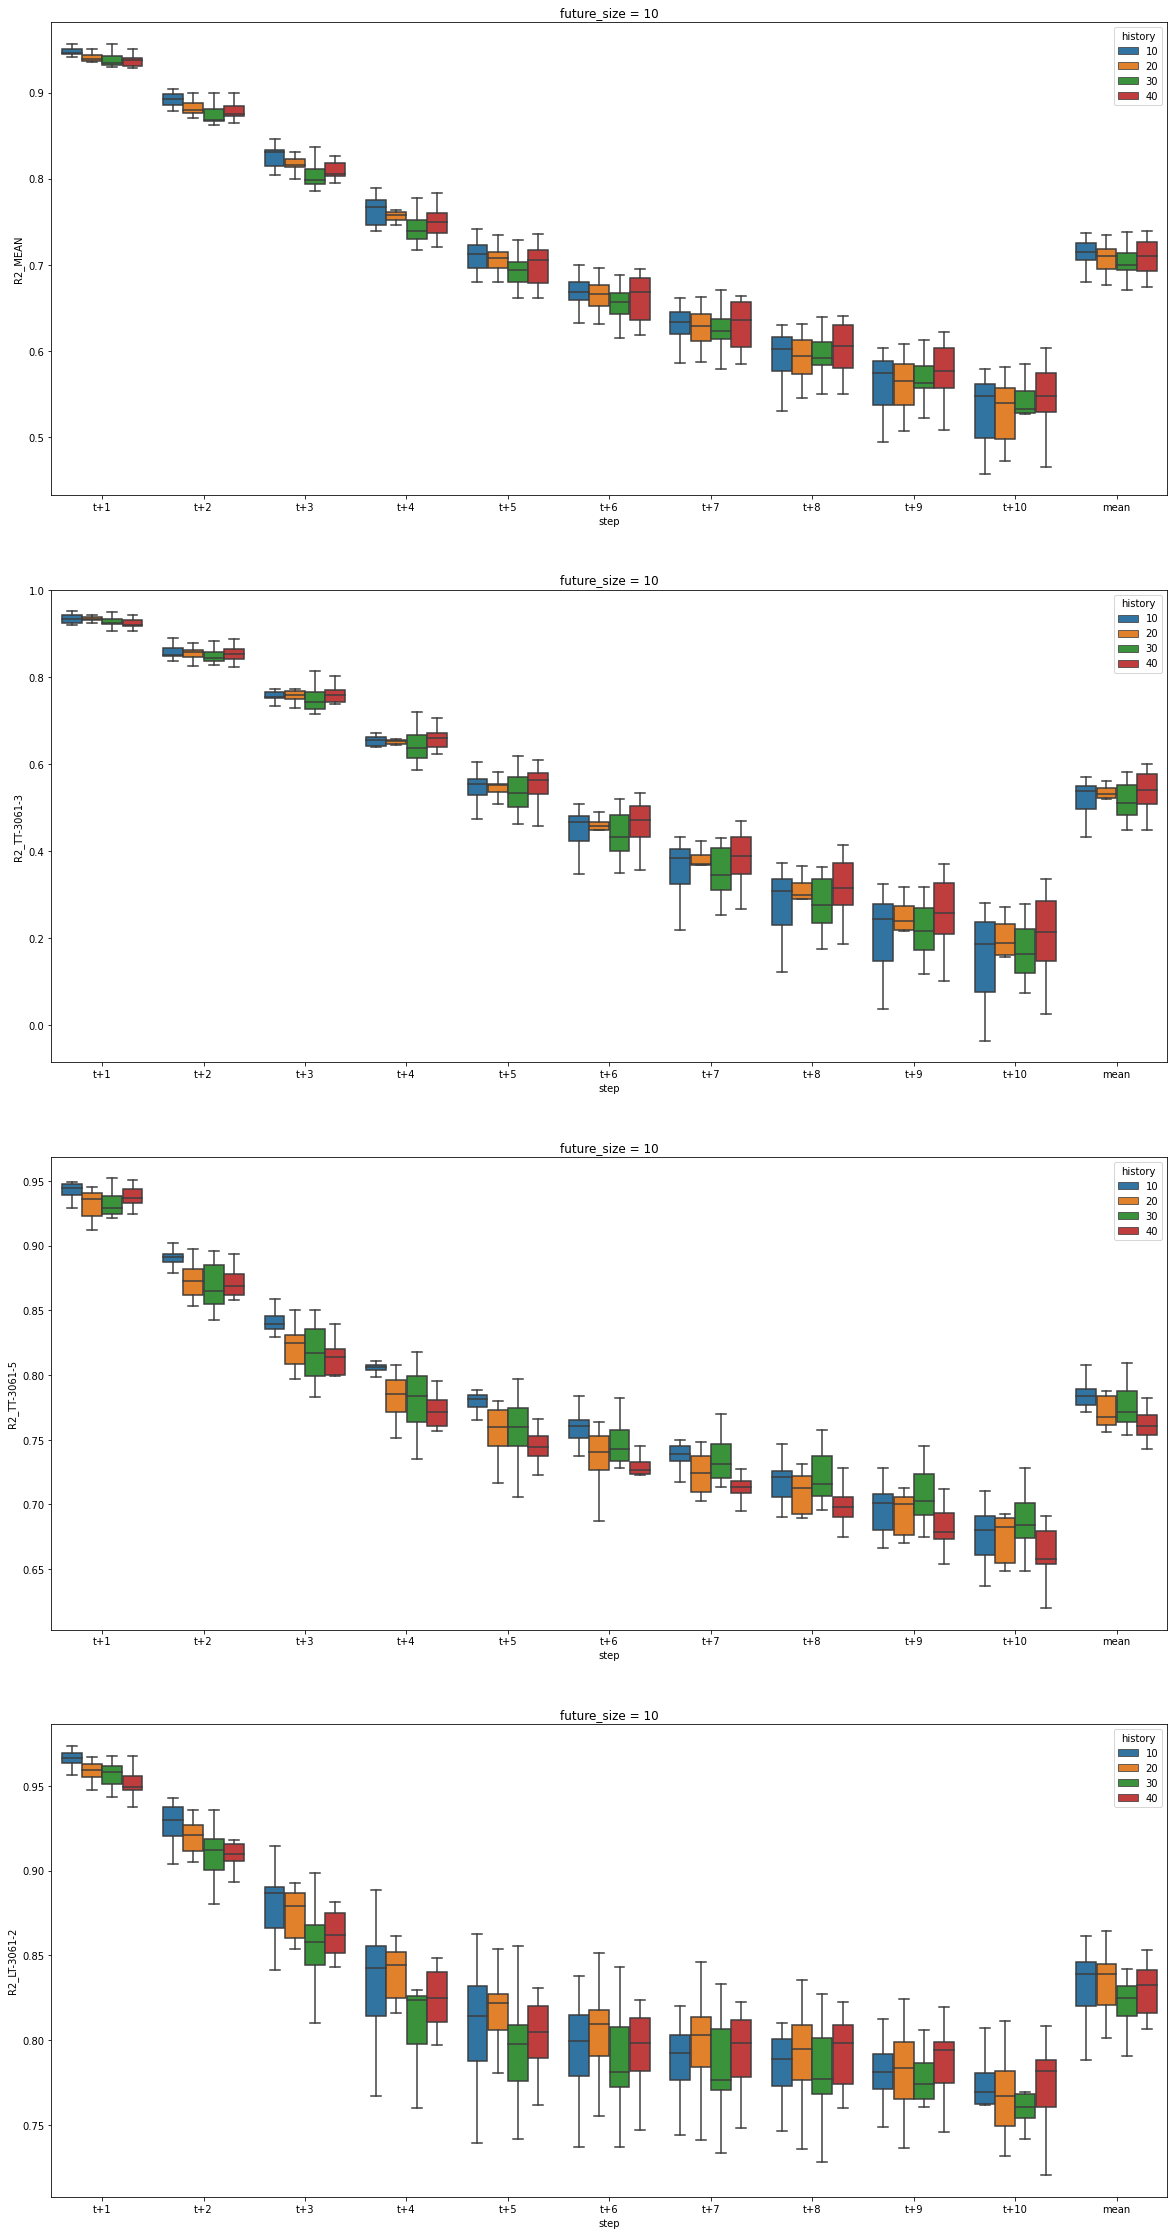

<Figure size 432x288 with 0 Axes>

In [6]:
plot_var = ['R2_MEAN', 'R2_TT-3061-3', 'R2_TT-3061-5', 'R2_LT-3061-2']
future_size = 10
plt.figure(figsize=(future_size*2,len(plot_var)*10))

for i, var in enumerate(plot_var):
    
    plt.subplot(len(plot_var), 1, i+1)
    plot_data = result_reshape[result_reshape['future']==future_size]
    sns.boxplot(x='step', y=var, hue='history', data=plot_data, notch=False, showfliers = False)
    # plt.ylim(-0.01, 0.3)
    plt.title(f"future_size = {future_size}")
plt.show()
plt.tight_layout()

## future window = 20

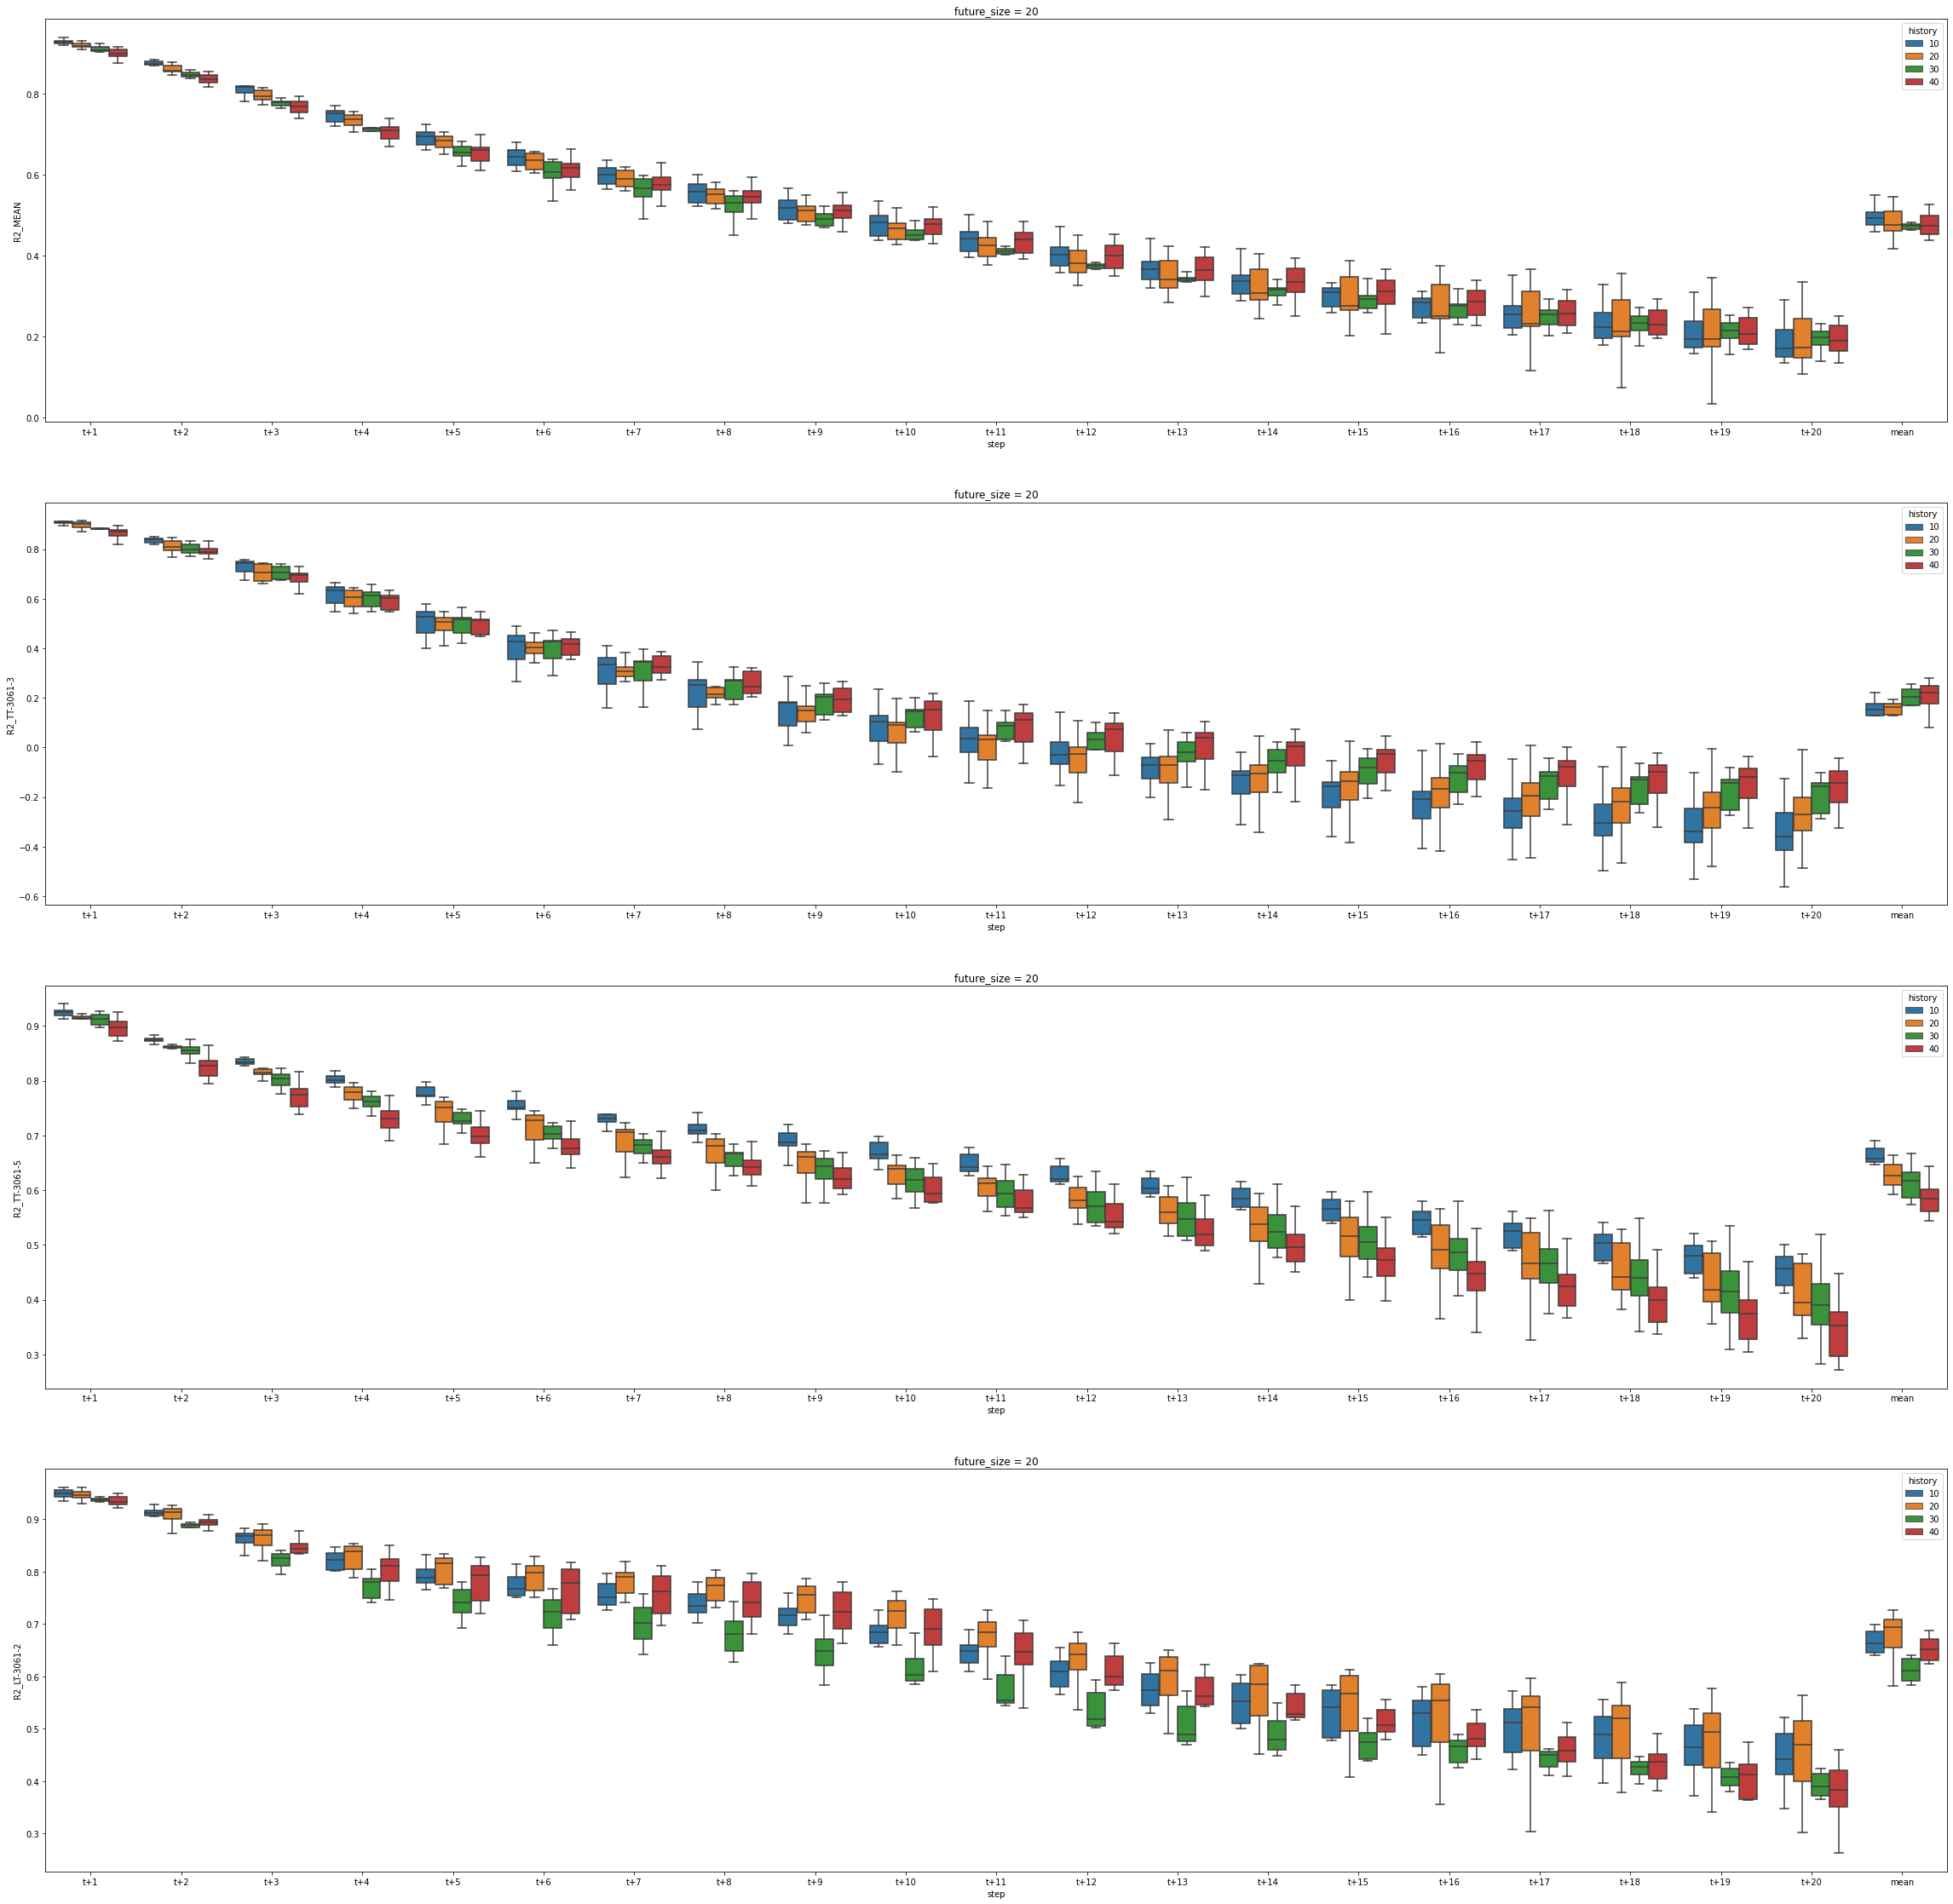

<Figure size 432x288 with 0 Axes>

In [7]:
plot_var = ['R2_MEAN', 'R2_TT-3061-3', 'R2_TT-3061-5', 'R2_LT-3061-2']
future_size = 20
plt.figure(figsize=(future_size*2,len(plot_var)*10))

for i, var in enumerate(plot_var):
    plt.subplot(len(plot_var), 1, i+1)
    plot_data = result_reshape[result_reshape['future']==future_size]
    sns.boxplot(x='step', y=var, hue='history', data=plot_data, notch=False, showfliers = False)
    # plt.ylim(-0.01, 0.3)
    plt.title(f"future_size = {future_size}")
plt.show()
plt.tight_layout()

## future window = 30

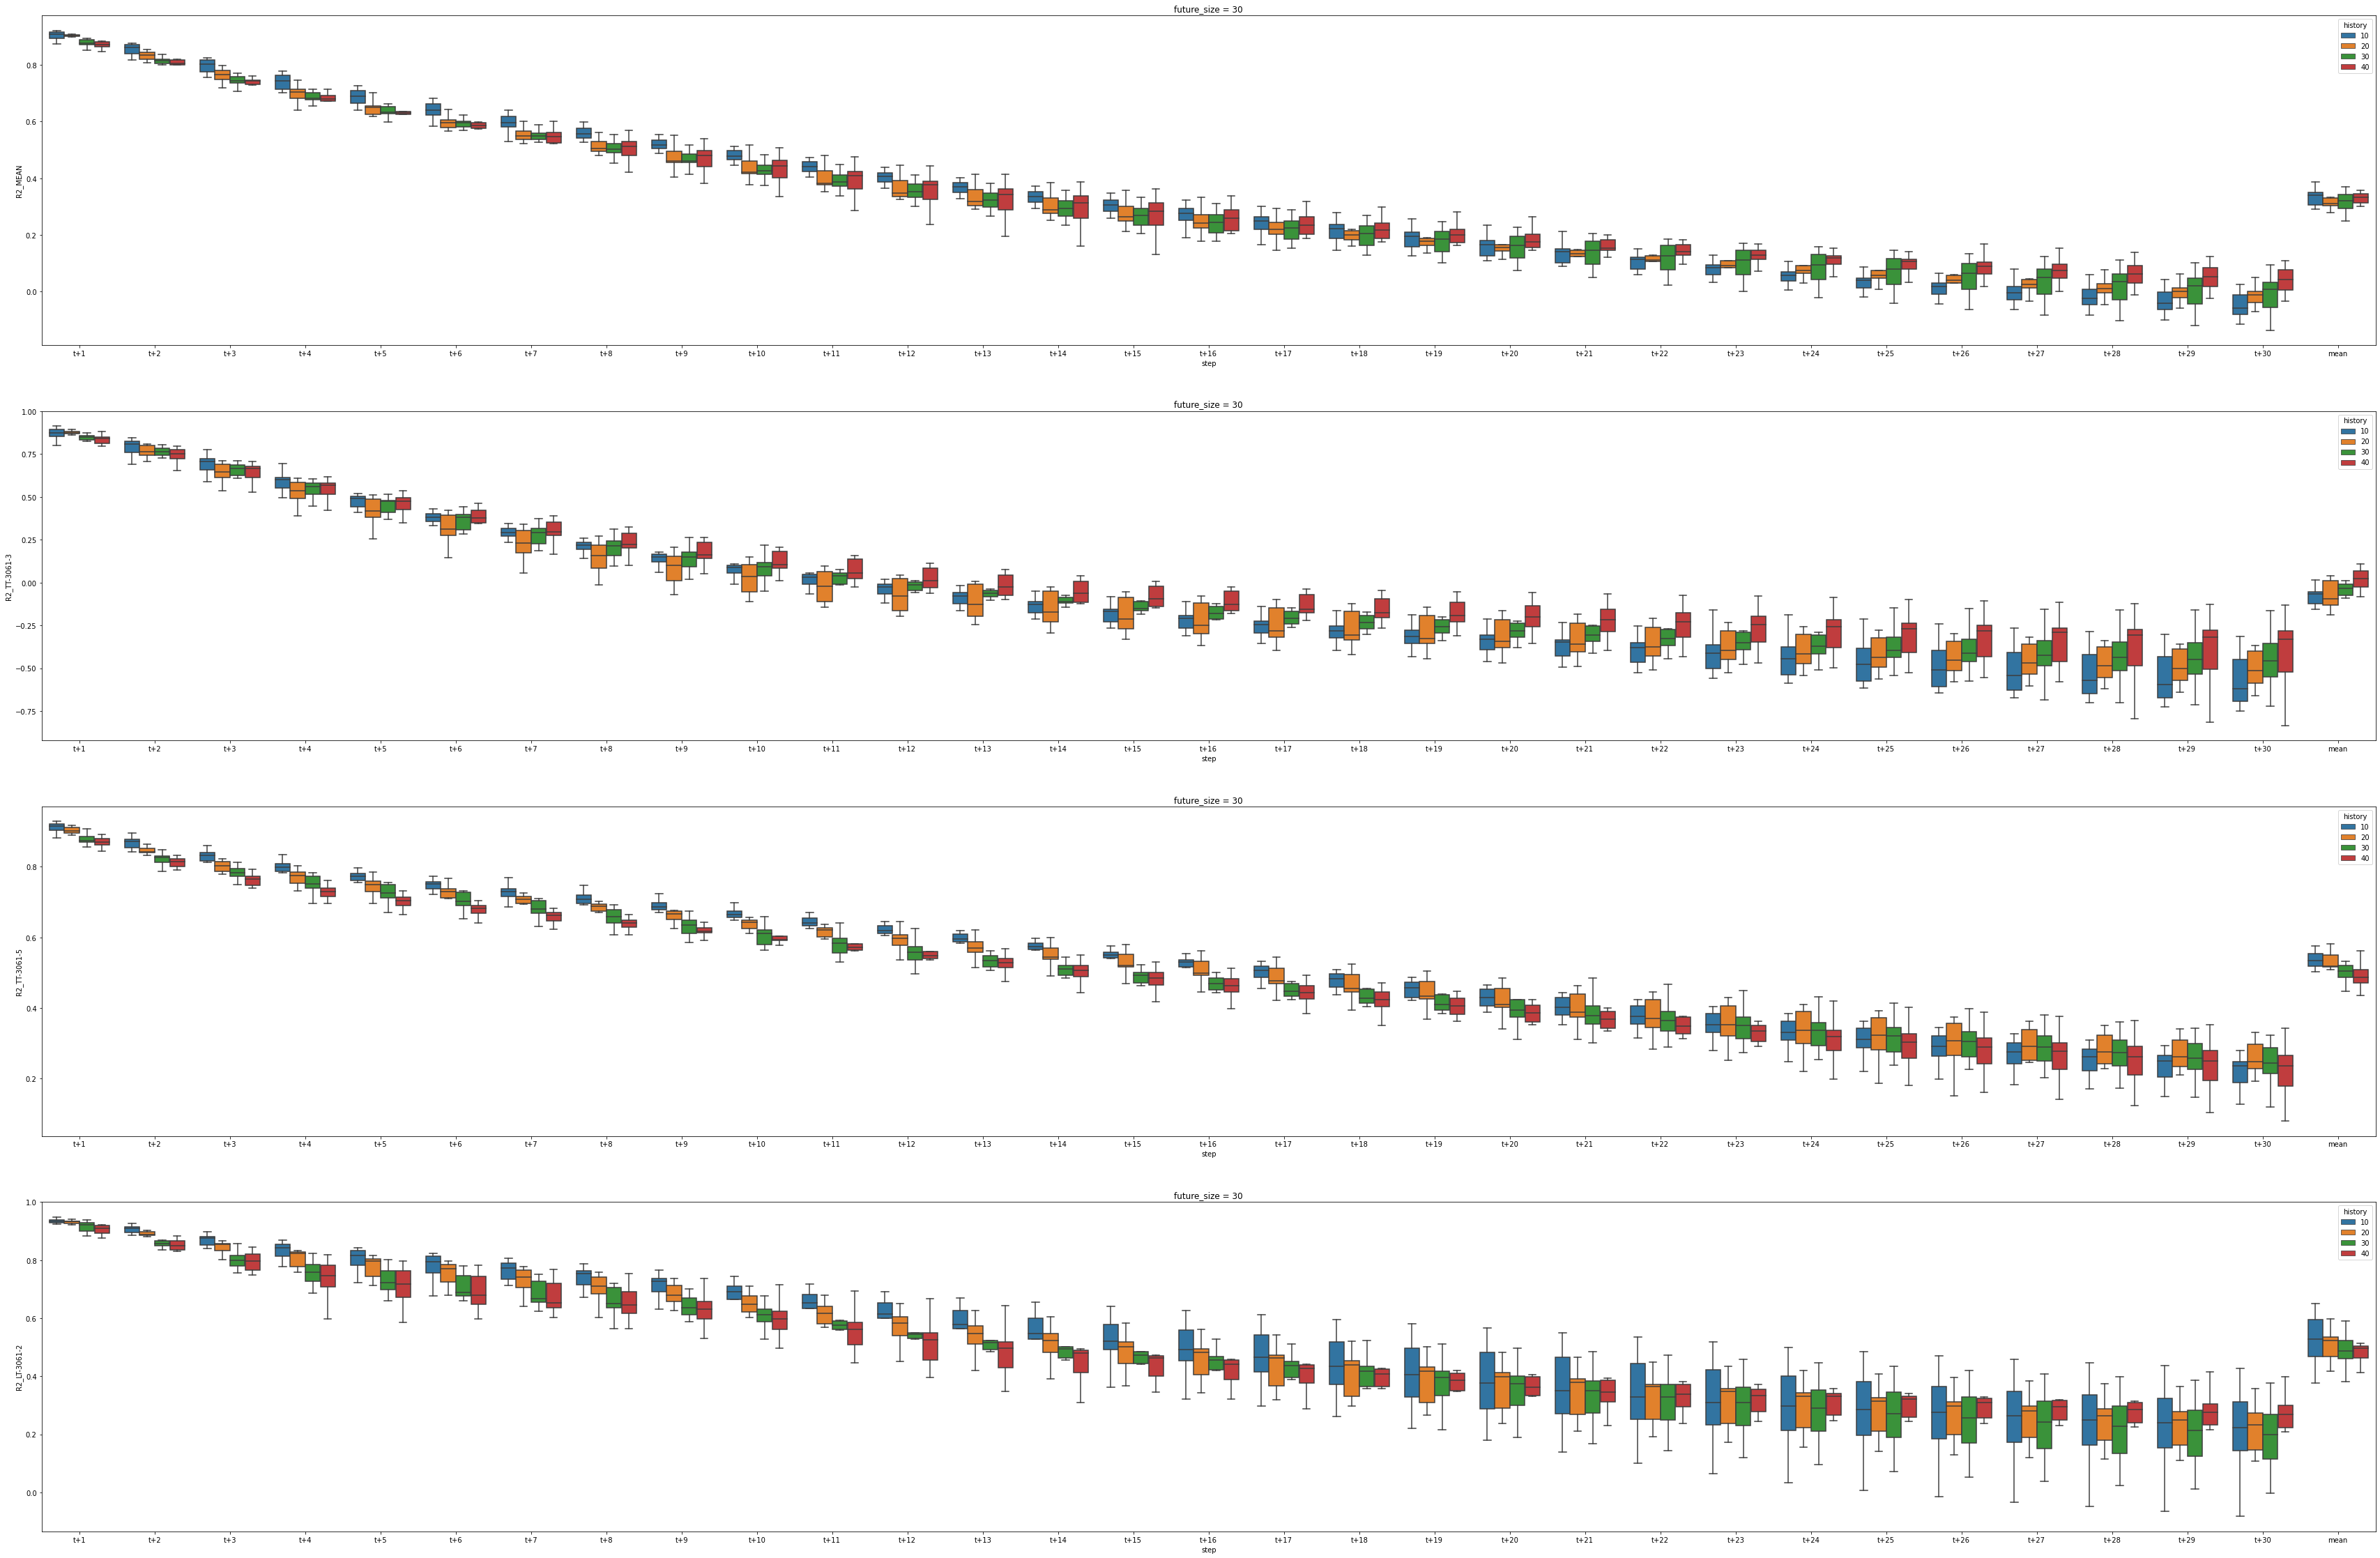

<Figure size 432x288 with 0 Axes>

In [8]:
plot_var = ['R2_MEAN', 'R2_TT-3061-3', 'R2_TT-3061-5', 'R2_LT-3061-2']
future_size = 30
plt.figure(figsize=(future_size*2,len(plot_var)*10))

for i, var in enumerate(plot_var):
    plt.subplot(len(plot_var), 1, i+1)
    plot_data = result_reshape[result_reshape['future']==future_size]
    sns.boxplot(x='step', y=var, hue='history', data=plot_data, notch=False, showfliers = False)
    # plt.ylim(-0.01, 0.3)
    plt.title(f"future_size = {future_size}")
plt.show()
plt.tight_layout()